In [1]:
import json
import pandas as pd
import numpy as np
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt
import html
import re

import string
import json
import requests
import maha

from maha.cleaners.functions import reduce_repeated_substring, remove_arabic_letter_dots, connect_single_letter_word ,keep, remove, contains, replace


from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper

from bidi.algorithm import get_display
from collections import Counter


import pyarabic.araby as araby
import arabicstopwords.arabicstopwords as stp

import nltk

from nltk.tokenize import TweetTokenizer



from nltk.stem.isri import ISRIStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords



C:\Users\alqarnia\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alqarnia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read File

In [2]:
pd.set_option('display.max_colwidth', None)
Data = pd.read_csv("./dataset/uncleaned_tweets")
Data['tweet']= Data['tweet'].astype(str)
Data['tweet'].replace(r"^ +| +$", r"", regex=True, inplace=True)


In [3]:
with open('./stopwords/list.txt',encoding='utf-8') as f:
    stop_words_2 = f.read().splitlines()

In [4]:
Data.describe()

,index
count,506284.00000
mean,253141.50000
std,146151.74618
min,0.00000
25%,126570.75000
50%,253141.50000
75%,379712.25000
max,506283.00000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506284 entries, 0 to 506283
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   506284 non-null  int64 
 1   tweet   506284 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.7+ MB


In [6]:
Data.head(10)

,index,tweet
0,0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel
1,1,RT @_AAN90: قررت فنلندا إلغاء جميع قيود كورونا بعد تطعيم 80٪ من جميع الأشخاص فوق سن 12 بالكامل
2,2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS
3,3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH
4,4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz
5,5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا
6,6,خوفًا من عدوى جماعية قد تؤدي إلى كارثة.. معتقلون سياسيون سابقون وأهالي معتقلين حاليين، يطالبون نظام #السيسي بسرعة تطعيم ذويهم ضد فيروس #كورونا؛ حفاظًا على أرواحهم، مطالبين أيضًا بالإفراج عن كل السجناء فوق عمر 60 عامًا https://t.co/5JAvRoWpDK
7,7,🚨🚨 إلى من يهمه الأمر نتمنى منكم تخفيض عدد التذاكر المطروحة لقسم العوائل نظرا لزيادة الطلب على تذاكر الأفراد مرفق إليكم صور توضح معانات قسم الأفراد في الجلوس على الممرات بينما عدد كبير من المقاعد متاحة في العوائل 😣 سواء قبل كورونا أو حتى بعد @MakaniSaudiPost @KASCjed https://t.co/jbQzTVeX5Q
8,8,#اليوم_الوطني_للتلقيح قامت الكشافة الإسلامية الجزائرية - فوج الفتح بتنظيم وتسيير اليوم الوطني للتلقيح ضد فيروس كورونا في بلدية أولاد دراج - ولاية المسيلة #كشافة #الكشافة_الإسلامية_الجزائرية #فوج_الفتح https://t.co/FxYLhZsYSg
9,9,نداء انساني مريض كورونا في مستشفى الجامعة الاميركية بحاجة ماسة إلى بلازما فئة دم A positive أو AB positive من شخص متعافي من كورونا منذ اقل من ثلاثة أشهر للتواصل... 70359863 03997473


In [7]:
Data[Data.duplicated(subset="tweet", keep='last')]

,index,tweet
0,0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel
2,2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS
3,3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH
4,4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz
5,5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا
...,...,...
506241,506241,مشاركة مجتمعية بالراشد مول بمناسبة #اليوم_الوطني_السعودي بين #جمعية_حياة 🍃 و #فلاورد 🌹. #المدينة_المنورة✨ @flowardCo 📱| ساهم عبر متجرنا الإلكتروني : https://t.co/OUkXAy90Im https://t.co/iS5cHJpFI9
506243,506243,"""Hyunjin, you can't eat Buldak noodles right?"" 🥟: Shall I try eating spicy things on live? I'm really bad at eating spicy foods. I used to be able to eat them, but at some point..."
506255,506255,مشاركة مجتمعية بالراشد مول بمناسبة #اليوم_الوطني_السعودي بين #جمعية_حياة 🍃 و #فلاورد 🌹. #المدينة_المنورة✨ @flowardCo 📱| ساهم عبر متجرنا الإلكتروني : https://t.co/OUkXAy90Im https://t.co/iS5cHJpFI9
506267,506267,مشاركة مجتمعية بالراشد مول بمناسبة #اليوم_الوطني_السعودي بين #جمعية_حياة 🍃 و #فلاورد 🌹. #المدينة_المنورة✨ @flowardCo 📱| ساهم عبر متجرنا الإلكتروني : https://t.co/OUkXAy90Im https://t.co/iS5cHJpFI9


In [8]:
Data=pd.DataFrame(Data["tweet"].unique()).reset_index().drop('index',axis=1)

Data.columns=['tweet']

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162444 entries, 0 to 162443
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   162444 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [10]:
Data.head(10)

,tweet
0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel
1,RT @_AAN90: قررت فنلندا إلغاء جميع قيود كورونا بعد تطعيم 80٪ من جميع الأشخاص فوق سن 12 بالكامل
2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS
3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH
4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz
5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا
6,خوفًا من عدوى جماعية قد تؤدي إلى كارثة.. معتقلون سياسيون سابقون وأهالي معتقلين حاليين، يطالبون نظام #السيسي بسرعة تطعيم ذويهم ضد فيروس #كورونا؛ حفاظًا على أرواحهم، مطالبين أيضًا بالإفراج عن كل السجناء فوق عمر 60 عامًا https://t.co/5JAvRoWpDK
7,🚨🚨 إلى من يهمه الأمر نتمنى منكم تخفيض عدد التذاكر المطروحة لقسم العوائل نظرا لزيادة الطلب على تذاكر الأفراد مرفق إليكم صور توضح معانات قسم الأفراد في الجلوس على الممرات بينما عدد كبير من المقاعد متاحة في العوائل 😣 سواء قبل كورونا أو حتى بعد @MakaniSaudiPost @KASCjed https://t.co/jbQzTVeX5Q
8,#اليوم_الوطني_للتلقيح قامت الكشافة الإسلامية الجزائرية - فوج الفتح بتنظيم وتسيير اليوم الوطني للتلقيح ضد فيروس كورونا في بلدية أولاد دراج - ولاية المسيلة #كشافة #الكشافة_الإسلامية_الجزائرية #فوج_الفتح https://t.co/FxYLhZsYSg
9,نداء انساني مريض كورونا في مستشفى الجامعة الاميركية بحاجة ماسة إلى بلازما فئة دم A positive أو AB positive من شخص متعافي من كورونا منذ اقل من ثلاثة أشهر للتواصل... 70359863 03997473


<b>Preprocessing

In [11]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)



In [12]:
import itertools
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك"
,"إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا"
,"اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة"
,"الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان"
,"اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب"
,"انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع"
,"بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين"
,"بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة"
,"ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى"
,"حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ"
,"ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث"
,"رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار"
,"صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة"
,"عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين"
,"عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد"
,"قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما"
,"كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما"
,"لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ"
,"لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء"
,"مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم"
,"نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك"
,"هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد"
,"وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان","يا","ال"}

STOPWORDS = set(stopwords.words('arabic'))
araby_stop_words=stp.stopwords_list()
stop_words_git_hub=set(stop_words_2)
print(len(STOPWORDS))
print(len(araby_stop_words))
print(len(stop_word_comp))
print(len(stop_words_git_hub))

Merged_stop_words=set(itertools.chain(STOPWORDS,araby_stop_words,stop_words_git_hub,stop_word_comp))
print(len(Merged_stop_words))

701
13629
483
755
14103


In [13]:
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar

def ortho_normalize(text):
    text = normalize_alef_maksura_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    return text

def processed_tweet(lemma):
    text=' '.join(lemma)
    return text
  

In [14]:
from camel_tools.tokenizers.morphological import MorphologicalTokenizer

from camel_tools.disambig.mle import MLEDisambiguator

from camel_tools.tokenizers.word import simple_word_tokenize

# instantiate the Maximum Likelihood Disambiguator
mle = MLEDisambiguator.pretrained()

# atbseg scheme
tokenizer = MorphologicalTokenizer(mle, scheme='atbseg')

In [15]:
def get_lemmas(tokenized_text):
    #print(tokenized_text)
    disambig = mle.disambiguate(tokenized_text)
    lemmas = [d.analyses[0].analysis['lex'] for d in disambig]
    return lemmas

In [16]:
st = ISRIStemmer()


def remove_stop_words(text):
    tk = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case = False) 
    text = simple_word_tokenize(text)
    
    text = [word for word in text if word not in Merged_stop_words and len(word)>1 ]
    text = ' '.join(word.strip() for word in text)
    return text



def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_diacritics(text):
    
    text=araby.strip_tashkeel(text)
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'[..]\1', text)

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text




def preprocess(tw):
    #remove users from tweets
    tw['Tweet_clean'].replace("(@[A-Za-z0-9]+)","",regex=True,inplace=True)
    #-----
    #Html coding
    tw["Tweet_clean"] = tw['Tweet_clean'].apply(lambda x: html.unescape(x))
      #remove  HTTPS links
    tw["Tweet_clean"].replace(r'https?://[A-Za-z0-9./]*','', regex=True,inplace=True)
   
    #------
    #remove non arabic character
    tw['Tweet_clean'].replace("([^0-9\u0621-\u064a\ufb50-\ufdff\ufe70-\ufefc])"," ",regex=True,inplace=True)
  
    #------
    # remove extra space
    tw["Tweet_clean"].replace("(\\r|)\\n$", '', regex=True,inplace=True)
    tw["Tweet_clean"] .replace(r'\s*[A-Za-z]+\b', '' ,regex=True,inplace=True)
    #remove digits
    tw["Tweet_clean"] .replace(r'(\d+)', '' ,regex=True,inplace=True)
    
    #---------------
    #remove extra space from texts
    tw['Tweet_clean'].replace(r"^ +| +$", r"", regex=True, inplace=True)
    #Stripping everything but alphanumeric chars from a string in Python
    tw["Tweet_clean"] .replace(r'#(\w+)', '' ,regex=True,inplace=True)
    tw = tw.reset_index(drop=True)
    return tw

In [17]:
import emoji
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

In [18]:
Data['stopwords'] = Data['tweet'].apply(lambda x: len([x for x in x.split() if x in Merged_stop_words]))
Data['emoji_count'] =Data['tweet'].apply(lambda x: emoji_counter(x))
Data['avg_words'] =Data['tweet'].apply(lambda x: avg_word(x))



<b>Before Processing EDA

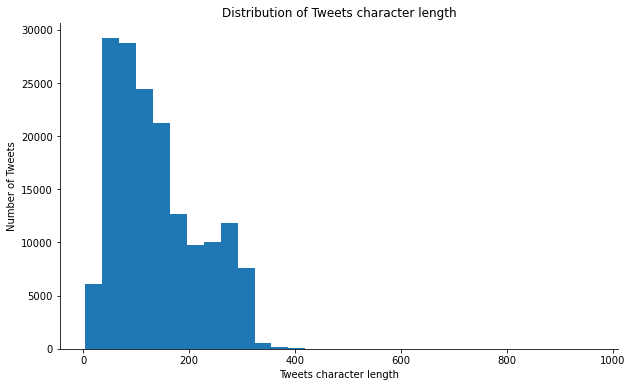

In [19]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in Data["tweet"]]
plt.hist(doc_lens, bins = 30)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

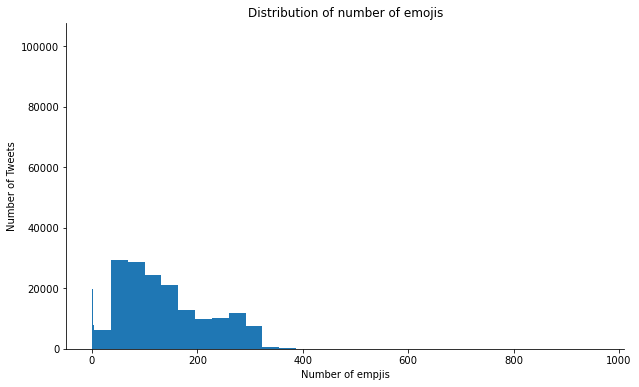

In [20]:
plt.figure(figsize=(10,6))
counts=Data['emoji_count'].value_counts()
plt.bar(range(len(counts)), counts)
plt.hist(doc_lens, bins =30)
plt.title('Distribution of number of emojis')
plt.ylabel('Number of Tweets')
plt.xlabel('Number of empjis')
sns.despine();
plt.show()


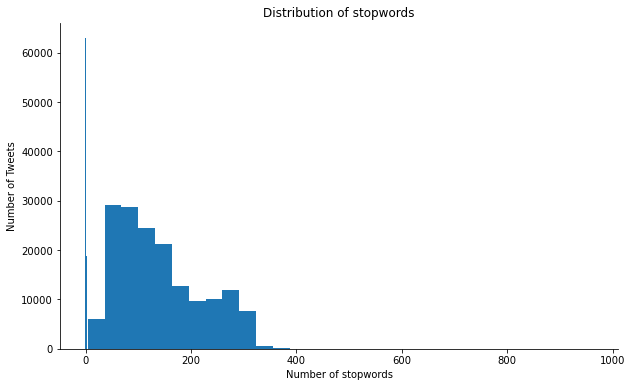

In [21]:
plt.figure(figsize=(10,6))
counts=Data['stopwords'].value_counts()
plt.bar(range(len(counts)), counts)
plt.hist(doc_lens, bins =30)
plt.title('Distribution of stopwords')
plt.ylabel('Number of Tweets')
plt.xlabel('Number of stopwords')
sns.despine();
plt.show()


In [22]:
Data.head(10)

,tweet,stopwords,emoji_count,avg_words
0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel,9,0,5.795455
1,RT @_AAN90: قررت فنلندا إلغاء جميع قيود كورونا بعد تطعيم 80٪ من جميع الأشخاص فوق سن 12 بالكامل,6,0,4.277778
2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS,4,0,9.066667
3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH,2,4,8.645161
4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz,2,1,9.033333
5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا,7,0,4.677419
6,خوفًا من عدوى جماعية قد تؤدي إلى كارثة.. معتقلون سياسيون سابقون وأهالي معتقلين حاليين، يطالبون نظام #السيسي بسرعة تطعيم ذويهم ضد فيروس #كورونا؛ حفاظًا على أرواحهم، مطالبين أيضًا بالإفراج عن كل السجناء فوق عمر 60 عامًا https://t.co/5JAvRoWpDK,9,0,5.540541
7,🚨🚨 إلى من يهمه الأمر نتمنى منكم تخفيض عدد التذاكر المطروحة لقسم العوائل نظرا لزيادة الطلب على تذاكر الأفراد مرفق إليكم صور توضح معانات قسم الأفراد في الجلوس على الممرات بينما عدد كبير من المقاعد متاحة في العوائل 😣 سواء قبل كورونا أو حتى بعد @MakaniSaudiPost @KASCjed https://t.co/jbQzTVeX5Q,17,3,5.062500
8,#اليوم_الوطني_للتلقيح قامت الكشافة الإسلامية الجزائرية - فوج الفتح بتنظيم وتسيير اليوم الوطني للتلقيح ضد فيروس كورونا في بلدية أولاد دراج - ولاية المسيلة #كشافة #الكشافة_الإسلامية_الجزائرية #فوج_الفتح https://t.co/FxYLhZsYSg,4,0,7.333333
9,نداء انساني مريض كورونا في مستشفى الجامعة الاميركية بحاجة ماسة إلى بلازما فئة دم A positive أو AB positive من شخص متعافي من كورونا منذ اقل من ثلاثة أشهر للتواصل... 70359863 03997473,10,0,4.687500


<b>Preprocessing

In [23]:
Data["Tweet_clean"] =Data['tweet']
Data=preprocess(Data)

In [24]:
Data['Tweet_clean'] = Data['Tweet_clean'].apply(remove_stop_words)
Data['Tweet_clean'] = Data['Tweet_clean'].apply(reduce_repeated_substring)
Data['Tweet_clean'] = Data['Tweet_clean'].apply(remove_diacritics)

Data['Tweet_clean'] = Data['Tweet_clean'].apply(ortho_normalize)

Data['Tweet_clean'] = Data['Tweet_clean'].apply(remove_stop_words)


In [25]:
%%time
Data["Tweet_clean"] .replace(r'#(\w+)', '' ,regex=True,inplace=True)
Data["Tokens"] =Data["Tweet_clean"].apply(simple_word_tokenize)


Data["Tokens"]=Data["Tokens"].apply(get_lemmas)
Data["Tweet_clean"]=Data['Tokens'].apply(processed_tweet)

Data["number_char"] = Data["Tweet_clean"].apply(lambda x: len(x))
Data["number_Tokens"]=Data['Tokens'].str.len()
Data['Tweet_clean'] = Data['Tweet_clean'].apply(remove_stop_words)

Wall time: 8min 47s


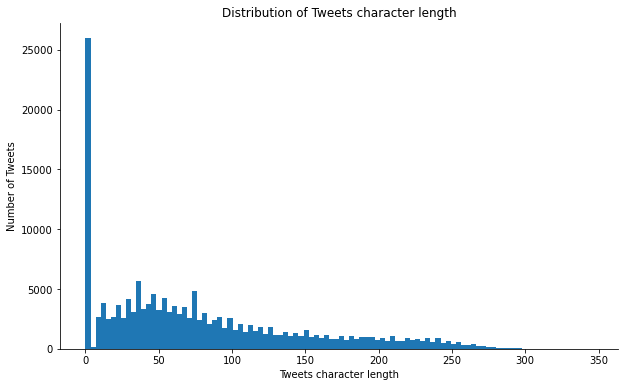

In [26]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in Data["Tweet_clean"]]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [27]:
Data.head(10)

,tweet,stopwords,emoji_count,avg_words,Tweet_clean,Tokens,number_char,number_Tokens
0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel,9,0,5.795455,وَطَنِيّ أَهْل خَيْر كَفَى زَوْج مَرِيض سَرَطان مُنْتَشِر جِسْم مقعدعايش كِيمِيائِيّ هَمّ سَداد دِين يشهدالله فَصْل عَمَل إِصابَة عَمَل خارِج مُؤَقَّت سِجْن هوعائلنا بعدالله مالنااحدتراكمت دَيْن عاجِز سدادهاماعندنادخل سَكَّن ايجارتكفون اللَّه حال صَعْب,"[وَطَنِيّ, أَهْل, خَيْر, كَفَى, زَوْج, مَرِيض, سَرَطان, مُنْتَشِر, جِسْم, مقعدعايش, كِيمِيائِيّ, هَمّ, سَداد, دِين, يشهدالله, فَصْل, عَمَل, إِصابَة, عَمَل, خارِج, مُؤَقَّت, سِجْن, هوعائلنا, بعدالله, مالنااحدتراكمت, دَيْن, عاجِز, سدادهاماعندنادخل, سَكَّن, ايجارتكفون, اللَّه, حال, صَعْب]",252,33
1,RT @_AAN90: قررت فنلندا إلغاء جميع قيود كورونا بعد تطعيم 80٪ من جميع الأشخاص فوق سن 12 بالكامل,6,0,4.277778,قَرَّر فِنْلَنْدا إِلْغاء قَيْد تَطْعِيم شَخْص سَنّ كامِل,"[قَرَّر, فِنْلَنْدا, إِلْغاء, قَيْد, تَطْعِيم, شَخْص, سَنّ, كامِل]",57,8
2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS,4,0,9.066667,سَعُودِيّ فلورز ٱِخْتار لَيّ يناسبك ٱِسْتَعَدّ ٱِنْبَهَر تَنْفِيذ واصَل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ أَمارَة دِفاع جَوِّيّ قُبُول مُوَحَّد كُوَيْت بُوسْنِيّ وَطَن حبيت خَيْر طالَب مَلِك دِراسَة جُمْعَة,"[سَعُودِيّ, فلورز, ٱِخْتار, لَيّ, يناسبك, ٱِسْتَعَدّ, ٱِنْبَهَر, تَنْفِيذ, واصَل, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, أَمارَة, دِفاع, جَوِّيّ, قُبُول, مُوَحَّد, كُوَيْت, بُوسْنِيّ, وَطَن, حبيت, قال, خَيْر, طالَب, مَلِك, دِراسَة, جُمْعَة]",219,30
3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH,2,4,8.645161,ٱِسْتَمْتَع خُصُوصِيّ حَدِيقَة خاصّ صَنَع جَمال تَمَيُّز رَفاهِيَّة عَيْش جَوّ ٱِسْتَمْتَع رَفاهِيَّة واصَل عَبْر رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت خَيْر عَمْرو دِياب قاطَع أَم سِي مِصْر جُمْعَة دِرْع دِرْع بَلَد,"[ٱِسْتَمْتَع, خُصُوصِيّ, حَدِيقَة, خاصّ, صَنَع, جَمال, تَمَيُّز, رَفاهِيَّة, عَيْش, جَوّ, ٱِسْتَمْتَع, رَفاهِيَّة, واصَل, عَبْر, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, حبيت, قال, خَيْر, عَمْرو, دِياب, قاطَع, أَم, سِي, مِصْر, جُمْعَة, دِرْع, دِرْع, بَلَد]",230,33
4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz,2,1,9.033333,مَشْرُوع أَرْضِيَّة خَرَسان مَطْبُوع يلا خاصّ قَصِيم ٱِسْتَمْتَع أَرْضِيَّة مُمَيَّز تَواصُل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت جُمْعَة أَحَد قُبُول مُوَحَّد قاطَع أَم سِي مِصْر عَمْرو دِياب,"[مَشْرُوع, أَرْضِيَّة, خَرَسان, مَطْبُوع, يلا, خاصّ, قَصِيم, ٱِسْتَمْتَع, أَرْضِيَّة, مُمَيَّز, تَواصُل, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, حبيت, قال, جُمْعَة, أَحَد, قُبُول, مُوَحَّد, قاطَع, أَم, سِي, مِصْر, عَمْرو, دِياب]",207,29
5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا,7,0,4.677419,تَوَقَّع مُؤَشِّر مُقْبِل أَزْمَة مالِيّ حُكُومَة ماعندها لُوس شَعْب مُفْلِس نَفْط صاعِد نازِل تَضَخُّم أَفْلَس شَرِكَة كَثِير مُؤَشِّر داشين طَوْفَة قَرِيب,"[تَوَقَّع, مُؤَشِّر, قال, أَنَّ, مُقْبِل, أَزْمَة, مالِيّ, حُكُومَة, ماعندها, لُوس, شَع

In [28]:
Data.to_csv("cleaned_tweets.csv", encoding="utf-8-sig") 

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162444 entries, 0 to 162443
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet          162444 non-null  object 
 1   stopwords      162444 non-null  int64  
 2   emoji_count    162444 non-null  int64  
 3   avg_words      162444 non-null  float64
 4   Tweet_clean    162444 non-null  object 
 5   Tokens         162444 non-null  object 
 6   number_char    162444 non-null  int64  
 7   number_Tokens  162444 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 9.9+ MB


In [30]:
Data=Data[Data['number_Tokens']>=4]
#Data=Data[Data['stopwords']==0]
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122328 entries, 0 to 162441
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet          122328 non-null  object 
 1   stopwords      122328 non-null  int64  
 2   emoji_count    122328 non-null  int64  
 3   avg_words      122328 non-null  float64
 4   Tweet_clean    122328 non-null  object 
 5   Tokens         122328 non-null  object 
 6   number_char    122328 non-null  int64  
 7   number_Tokens  122328 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 8.4+ MB


**EDA for more exploring (Arabic Tweets)**

In [31]:
from nltk.corpus import stopwords


Data['word_count'] = Data['Tweet_clean'].apply(lambda x: len(str(x).split(" ")))
Data['char_count'] = Data['Tweet_clean'].str.len() ## this also includes spaces
Data['avg_char_per_word'] =Data['Tweet_clean'].apply(lambda x: avg_word(x))

Data['stopwords'] = Data['Tweet_clean'].apply(lambda x: len([x for x in x.split() if x in Merged_stop_words]))
Data['emoji_count'] =Data['Tweet_clean'].apply(lambda x: emoji_counter(x))




In [32]:
Data['stopwords'] = Data['Tweet_clean'].apply(lambda x: len([x for x in x.split() if x in Merged_stop_words]))

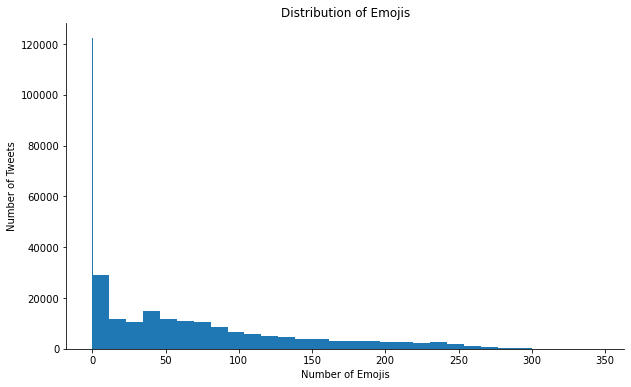

In [33]:
plt.figure(figsize=(10,6))
counts=Data['emoji_count'].value_counts()
plt.bar(range(len(counts)), counts)
plt.hist(doc_lens, bins =30)
plt.title('Distribution of Emojis')
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Emojis')
sns.despine();
plt.show()


In [34]:
Data.tail()

,tweet,stopwords,emoji_count,avg_words,Tweet_clean,Tokens,number_char,number_Tokens,word_count,char_count,avg_char_per_word
162434,"͏ ͏ ͏ "" آللهم صلِ وسَلم على نبينآ محمد ﷺ "" ͏ ͏ ͏",0,0,2.266667,اللّٰهُمَّ صل نَبِيّ مُحَمَّد,"[اللّٰهُمَّ, صل, س, نَبِيّ, مُحَمَّد]",31,5,4,29,6.500000
162437,#اليوم_الوطني_السعودي تاريخ مجيد وعمر مديد عز وفخر وعطاء ونماء وبناء يوم يفرح فيه الصديق ويغيض الحاسدين اللهم زد الأعداء والحاسدين غيضاً وهواناً واحفظ بلادنا وحكامنا من شر الأعداء والحاقدين وزدنا أمناً وأماناً ورغد في العيش! https://t.co/3oMpQIZ2ZC,0,0,5.916667,وَطَنِيّ سَعُودِيّ تارِيخ مَجِيد عُمَر مَدِيد عِزّ فَخْر عَطاء نَماء بِناء فَرِح صَدِيق غاض حاسِد اللّٰهُمَّ زد عَدُوّ حاسِد غَيْض هُوَّة حَفِظ بَلَد حاكِم شَرّ عَدُوّ حاقِد زاد أَمْن أَمان رَغَد عَيْش,"[وَطَنِيّ, سَعُودِيّ, تارِيخ, مَجِيد, عُمَر, مَدِيد, عِزّ, فَخْر, عَطاء, نَماء, بِناء, فَرِح, صَدِيق, غاض, حاسِد, اللّٰهُمَّ, زد, عَدُوّ, حاسِد, غَيْض, هُوَّة, حَفِظ, بَلَد, حاكِم, شَرّ, عَدُوّ, حاقِد, زاد, أَمْن, أَمان, رَغَد, عَيْش]",201,32,32,201,5.312500
162438,شرطة تبوك تعلن القبض على مقيم يمني أثناء هروبه من حادثة محاولة دهس رجل أمن. ما تلاحضون الفترة الاخيرة اغلب عمليات القبض لا بد يكون فيها مقيم من الجنسية اليمنية ؟! #تبوك #اليوم_الوطني_السعودي https://t.co/gXSKvZADjy,0,0,5.323529,شُرْطَة تَبّ أَعْلَن قَبْض مُقِيم يَمَنِيّ هُرُوب حادِث مُحاوَلَة دَهَس رَجُل تلاحضون فَتْرَة أَغْلَب عَمَلِيَّة قَبْض مُقِيم جِنْسِيَّة يَمَنِيّ تَبّ وَطَنِيّ سَعُودِيّ,"[شُرْطَة, تَبّ, أَعْلَن, قَبْض, مُقِيم, يَمَنِيّ, هُرُوب, حادِث, مُحاوَلَة, دَهَس, رَجُل, تلاحضون, فَتْرَة, أَغْلَب, عَمَلِيَّة, قَبْض, مُقِيم, جِنْسِيَّة, يَمَنِيّ, تَبّ, وَطَنِيّ, سَعُودِيّ]",169,22,22,169,6.727273
162440,قال النبي ﷺ: اكثروا من الصلاة علي ليلة الجمعة ويوم الجمعة فإن صلاتكم معروضة علي♥️🌿,0,0,4.533333,نَبِيّ أَكْثَر صَلاة جُمْعَة يَوْم جُمْعَة صَلاة مَعْرُوض,"[نَبِيّ, أَكْثَر, صَلاة, جُمْعَة, يَوْم, جُمْعَة, صَلاة, مَعْرُوض]",57,8,8,57,6.250000
162441,مشاركة بسيطة من الوالده الله يحفظها ويطول بعمرها بمناسبة اليوم الوطني السعودي بشعار #هي_لنا_دار . اللهم أحفظ بلادنا ومملكتنا الحبيبة . #السعوديه_هى_دار_لنا_91 https://t.co/h4XhUK2Sbk,0,0,6.956522,مُشارَكَة بَسِيطَة والِد اللَّه حَفِظ طال عُمْر مُناسَبَة وَطَنِيّ سَعُودِيّ شِعار دار اللّٰهُمَّ أَحْفَظ بَلَد مَمْلَكَة حَبِيب سَعُودِيّ دار,"[مُشارَكَة, بَسِيطَة, والِد, اللَّه, حَفِظ, طال, عُمْر, مُناسَبَة, وَطَنِيّ, سَعُودِيّ, شِعار, دار, اللّٰهُمَّ, أَحْفَظ, بَلَد, مَمْلَكَة, حَبِيب, سَعُودِيّ, دار]",142,19,19,142,6.526316


In [35]:
import nltk
nltk.download('punkt')
  
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

tops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()
from textblob import TextBlob
def to_arabic(text):
    return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)
    
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alqarnia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
#Data["Tweet_clean"] .replace(r'\s+', ' ' ,regex=True,inplace=True)
Data['Tweet_clean'] = Data['Tweet_clean'].apply(ortho_normalize)
#Data['Tweet_clean'] = Data['Tweet_clean'].apply(remove_stop_words)
#Data=Data.drop_duplicates(subset="Tweet_clean",keep="last")


In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122328 entries, 0 to 162441
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet              122328 non-null  object 
 1   stopwords          122328 non-null  int64  
 2   emoji_count        122328 non-null  int64  
 3   avg_words          122328 non-null  float64
 4   Tweet_clean        122328 non-null  object 
 5   Tokens             122328 non-null  object 
 6   number_char        122328 non-null  int64  
 7   number_Tokens      122328 non-null  int64  
 8   word_count         122328 non-null  int64  
 9   char_count         122328 non-null  int64  
 10  avg_char_per_word  122328 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 11.2+ MB


In [38]:
Data.describe()

,stopwords,emoji_count,avg_words,number_char,number_Tokens,word_count,char_count,avg_char_per_word
count,122328.0,122328.0,122328.000000,122328.000000,122328.000000,122328.000000,122328.000000,122328.000000
mean,0.0,0.0,6.951733,102.900415,14.636763,14.479718,102.274066,6.125192
std,0.0,0.0,2.838982,64.645388,8.946215,8.851670,64.295143,0.814596
min,0.0,0.0,1.348485,13.000000,4.000000,2.000000,9.000000,2.700000
25%,0.0,0.0,5.175000,51.000000,7.000000,7.000000,50.000000,5.600000
50%,0.0,0.0,6.200000,83.000000,12.000000,12.000000,82.000000,6.100000
75%,0.0,0.0,7.800000,143.000000,20.000000,20.000000,142.000000,6.600000
max,0.0,0.0,69.500000,346.000000,52.000000,52.000000,346.000000,31.750000


In [39]:
Data.head(10)

,tweet,stopwords,emoji_count,avg_words,Tweet_clean,Tokens,number_char,number_Tokens,word_count,char_count,avg_char_per_word
0,#اليوم_الوطني ي اهل الخير تكفون زوجي مريض بالسرطان منتشر بجسمة مقعدعايش على الكيماوي وكل همة سداد الدين يشهدالله تم فصلة من العمل باصابة عمل خارج مؤقت بسبب كورونا من السجن هوعائلنا بعدالله مالنااحدتراكمت علية الديون وعاجز عن سدادهاماعندنادخل ونسكن ايجارتكفون والله حالنا صعب https://t.co/Kj6qKtYJel,0,0,5.795455,وَطَنِيّ اَهْل خَيْر كَفَي زَوْج مَرِيض سَرَطان مُنْتَشِر جِسْم مقعدعايش كِيمِيائِيّ هَمّ سَداد دِين يشهدالله فَصْل عَمَل اِصابَه عَمَل خارِج مُؤَقَّت سِجْن هوعائلنا بعدالله مالنااحدتراكمت دَيْن عاجِز سدادهاماعندنادخل سَكَّن ايجارتكفون اللَّه حال صَعْب,"[وَطَنِيّ, أَهْل, خَيْر, كَفَى, زَوْج, مَرِيض, سَرَطان, مُنْتَشِر, جِسْم, مقعدعايش, كِيمِيائِيّ, هَمّ, سَداد, دِين, يشهدالله, فَصْل, عَمَل, إِصابَة, عَمَل, خارِج, مُؤَقَّت, سِجْن, هوعائلنا, بعدالله, مالنااحدتراكمت, دَيْن, عاجِز, سدادهاماعندنادخل, سَكَّن, ايجارتكفون, اللَّه, حال, صَعْب]",252,33,33,252,6.666667
1,RT @_AAN90: قررت فنلندا إلغاء جميع قيود كورونا بعد تطعيم 80٪ من جميع الأشخاص فوق سن 12 بالكامل,0,0,4.277778,قَرَّر فِنْلَنْدا اِلْغاء قَيْد تَطْعِيم شَخْص سَنّ كامِل,"[قَرَّر, فِنْلَنْدا, إِلْغاء, قَيْد, تَطْعِيم, شَخْص, سَنّ, كامِل]",57,8,8,57,6.250000
2,مع سعودي فلورز اختار اللي يناسبك واستعد تنبهر بعد التنفيذ تواصل معنا على الارقام التالية 0534305248 0500888750 #الدمام #الدفاع_الجوي_السعودي #الامارات #الدفاع_الجوي #القبول_الموحد #الكويت_البوسنة #الوطن #بس_حبيت_اقول #كورونا #صباح_الخير #نطالب_الملك_بالدراسه_عن_بعد #يوم_الجمعة https://t.co/vc2HToUgBS,0,0,9.066667,سَعُودِيّ فلورز اِخْتار لَيّ يناسبك اِسْتَعَدّ اِنْبَهَر تَنْفِيذ واصَل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ اَمارَه دِفاع جَوِّيّ قُبُول مُوَحَّد كُوَيْت بُوسْنِيّ وَطَن حبيت خَيْر طالَب مَلِك دِراسَه جُمْعَه,"[سَعُودِيّ, فلورز, ٱِخْتار, لَيّ, يناسبك, ٱِسْتَعَدّ, ٱِنْبَهَر, تَنْفِيذ, واصَل, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, أَمارَة, دِفاع, جَوِّيّ, قُبُول, مُوَحَّد, كُوَيْت, بُوسْنِيّ, وَطَن, حبيت, قال, خَيْر, طالَب, مَلِك, دِراسَة, جُمْعَة]",219,30,29,215,6.448276
3,استمتع بالخصوصية في حديقتك الخاصة🏞 نصنع الجمال والتميز والرفاهية عيش جوك واستمتع بالرفاهية🏡⛲ وتواصل معنا عبر الارقام التالية:👇 0500888750 0590756444 #الدمام #الدفاع_الجوي_السعودي #بس_حبيت_اقول #صباح_الخير #عمرو_دياب #قاطعوا_ام_بي_سى_مصر #كورونا #يوم_الجمعة #درعا #درعا_البلد https://t.co/Fjm6DlE4IH,0,0,8.645161,اِسْتَمْتَع خُصُوصِيّ حَدِيقَه خاصّ صَنَع جَمال تَمَيُّز رَفاهِيَّه عَيْش جَوّ اِسْتَمْتَع رَفاهِيَّه واصَل عَبْر رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت خَيْر عَمْرو دِياب قاطَع اَم سِي مِصْر جُمْعَه دِرْع دِرْع بَلَد,"[ٱِسْتَمْتَع, خُصُوصِيّ, حَدِيقَة, خاصّ, صَنَع, جَمال, تَمَيُّز, رَفاهِيَّة, عَيْش, جَوّ, ٱِسْتَمْتَع, رَفاهِيَّة, واصَل, عَبْر, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, حبيت, قال, خَيْر, عَمْرو, دِياب, قاطَع, أَم, سِي, مِصْر, جُمْعَة, دِرْع, دِرْع, بَلَد]",230,33,32,226,6.093750
4,مشروع أرضيات الخرسانة المطبوعة ڤيلا خاصه بالقصيم استمتع معنا بأرضيات مميزة👍 للتواصل على الارقام التالية 0500888750 0590756444 0592662299 0590756444 0534305248 #الدمام #الدفاع_الجوي_السعودي #كورونا #بس_حبيت_اقول #يوم_الجمعة #الأحد #القبول_الموحد #قاطعوا_ام_بي_سى_مصر #عمرو_دياب https://t.co/WTQliq0Dsz,0,0,9.033333,مَشْرُوع اَرْضِيَّه خَرَسان مَطْبُوع يلا خاصّ قَصِيم اِسْتَمْتَع اَرْضِيَّه مُمَيَّز تَواصُل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت جُمْعَه اَحَد قُبُول مُوَحَّد قاطَع اَم سِي مِصْر عَمْرو دِياب,"[مَشْرُوع, أَرْضِيَّة, خَرَسان, مَطْبُوع, يلا, خاصّ, قَصِيم, ٱِسْتَمْتَع, أَرْضِيَّة, مُمَيَّز, تَواصُل, رَقْم, تالِي, دَمّام, دِفاع, جَوِّيّ, سَعُودِيّ, حبيت, قال, جُمْعَة, أَحَد, قُبُول, مُوَحَّد, قاطَع, أَم, سِي, مِصْر, عَمْرو, دِياب]",207,29,28,203,6.285714
5,اتوقع كل المؤشرات تقول اننا مقبلين على ازمة ماليه الحكومة ماعندها فلوس الشعب مفلس النفط يوم صاعد يوم نازل تضخم كورونا افلست شركات كثيره ف كل المؤشرات تقولك داشين بالطوفه قريبا,0,0,4.677419,تَوَقَّع مُؤَشِّر مُقْبِل اَزْمَه مالِيّ حُكُومَه ماعندها لُوس شَعْب مُفْلِس نَفْط صاعِد نازِل تَضَخُّم اَفْلَس شَرِكَه كَثِير 

In [40]:
documents = Data["Tokens"].values
texts =documents
#Building Dictionary for LDA
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [41]:
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count >10:
        break

0 أَهْل
1 إِصابَة
2 اللَّه
3 ايجارتكفون
4 بعدالله
5 جِسْم
6 حال
7 خارِج
8 خَيْر
9 دَيْن
10 دِين


In [42]:
documents = Data["Tokens"].values
texts =documents
#Building Dictionary for LDA
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [43]:
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count >10:
        break

0 أَهْل
1 إِصابَة
2 اللَّه
3 ايجارتكفون
4 بعدالله
5 جِسْم
6 حال
7 خارِج
8 خَيْر
9 دَيْن
10 دِين


<br>EDA

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =CountVectorizer(analyzer='word', ngram_range=(1, 1))

X = vectorizer.fit_transform(Data['Tweet_clean'])


In [45]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os


font_file = './MY_FONT/Almarai-Regular.ttf' # download from: https://www.google.com/get/noto

font_name = fm.FontProperties(fname=font_file).get_name()
matplotlib.rc('font', family=font_name)
print("font family: ", plt.rcParams['font.family'])


font family:  ['Almarai']


font family:  ['Times New Roman']


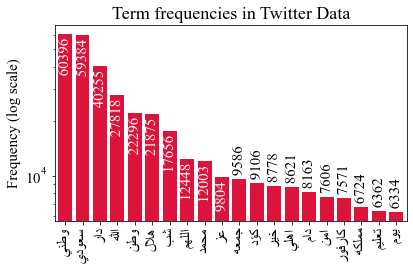

In [46]:
import matplotlib.pyplot as plt
import pylab as plb
plt.rcParams["font.family"] = 'Times New Roman'
plb.rcParams['font.size'] = 15
print("font family: ", plt.rcParams['font.family'])
tf=Counter(" ".join(Data["Tweet_clean"]).split())
y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]
x_arabic=[]
#for arabic code and deisplaying non english characters
for word in x:
  xword = arabic_reshaper.reshape(word.encode().decode('utf8'))
  artext = get_display(xword) 

  x_arabic.append(artext)
#---------------------------------------------------------
plt.bar(x_arabic, y, color='crimson')
plt.title("Term frequencies in Twitter Data")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely


plt.show()



font family:  ['Times New Roman']


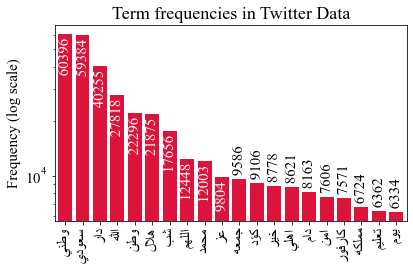

In [47]:
import matplotlib.pyplot as plt
import pylab as plb
plt.rcParams["font.family"] = 'Times New Roman'
plb.rcParams['font.size'] = 15
print("font family: ", plt.rcParams['font.family'])
tf=Counter(" ".join(Data["Tweet_clean"]).split())
y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]
x_arabic=[]
#for arabic code and deisplaying non english characters
for word in x:
  xword = arabic_reshaper.reshape(word.encode().decode('utf8'))
  artext = get_display(xword) 

  x_arabic.append(artext)
#---------------------------------------------------------
plt.bar(x_arabic, y, color='crimson')
plt.title("Term frequencies in Twitter Data")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely


plt.show()

In [48]:

wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS,font_path=font_file,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

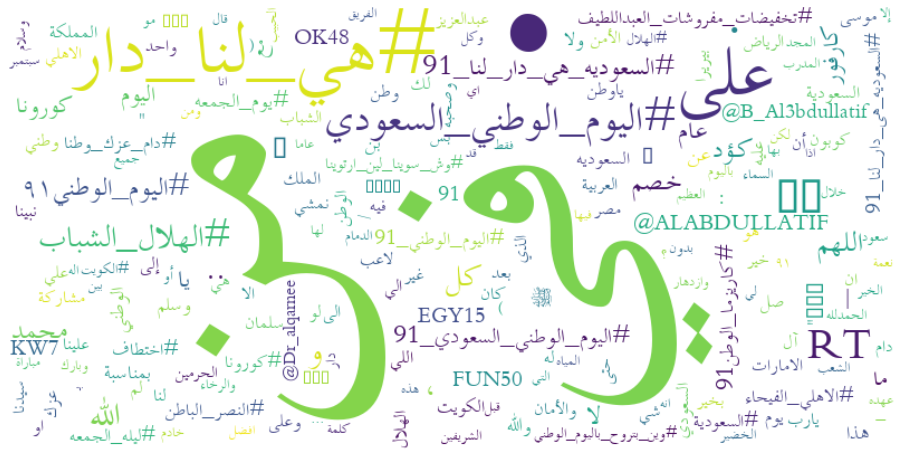

In [49]:
rtl = lambda w: get_display(arabic_reshaper.reshape(f'{w}'))
counts = {rtl(k):v for k, v in Counter(" ".join(Data["tweet"]).split()).most_common(200)}

plt.figure(figsize=(16, 12))
font_file="./MY_FONT/trado.ttf"
wordcloud = WordCloud(background_color='white',font_path=font_file,random_state = 17, width=800, height=400).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

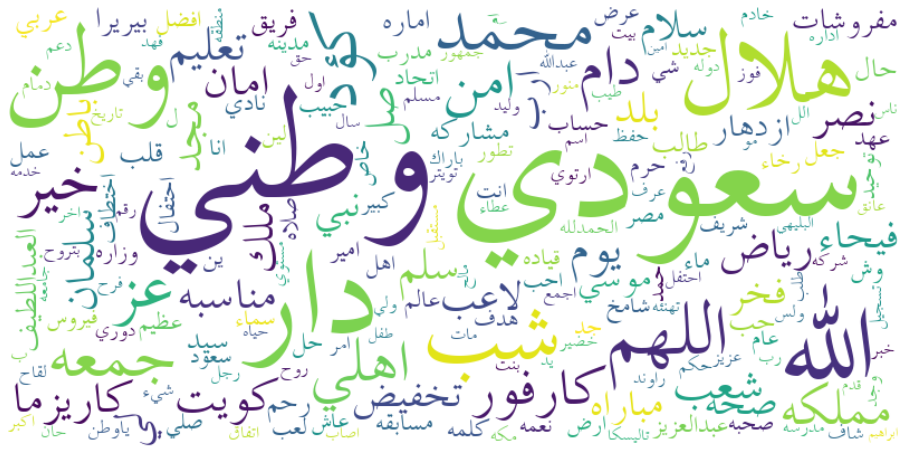

In [50]:
rtl = lambda w: get_display(arabic_reshaper.reshape(f'{w}'))
counts = {rtl(k):v for k, v in Counter(" ".join(Data["Tweet_clean"]).split()).most_common(200)}

plt.figure(figsize=(16, 12))
font_file="./MY_FONT/trado.ttf"
wordcloud = WordCloud(background_color='white',font_path=font_file,random_state = 17, width=800, height=400).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<b>Building LDA Models

In [52]:
number_of_topics=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
case_list = {}
for i in number_of_topics:
    no_topics =i
    #lda MODEL
    lda = LdaMulticore(corpus, id2word=id2word, num_topics=no_topics)
    # Compute Perplexity 
    base_perplexity = lda.log_perplexity(corpus)
    print("\nPerplexity: ", base_perplexity)

    # Compute Coherence Score
    coherence_model = CoherenceModel(model = lda, texts = Data['Tokens'].tolist(),
                                 coherence = "c_v")
    coherence_lda_model_base = coherence_model.get_coherence()
    print("\nCoherence Score: ", coherence_lda_model_base)
    
    case = {'Topic_number': i, 'Preplexity': base_perplexity, 'Coherence Score':coherence_lda_model_base }
    case_list[i]=case
    


Perplexity:  -7.637131759496868

Coherence Score:  0.38009559396025283

Perplexity:  -7.7058114667532855

Coherence Score:  0.2798673120180349

Perplexity:  -7.661565505946241

Coherence Score:  0.3677717527170211

Perplexity:  -7.706019027031033

Coherence Score:  0.39880115492963875

Perplexity:  -7.750281674646073

Coherence Score:  0.24613595933694798

Perplexity:  -7.7262060218473625

Coherence Score:  0.3204548676926433

Perplexity:  -7.759638631215253

Coherence Score:  0.40229032123465003

Perplexity:  -7.816191047980688

Coherence Score:  0.3643832363236682

Perplexity:  -7.849496344550551

Coherence Score:  0.3815336616714382

Perplexity:  -7.97377530906727

Coherence Score:  0.34093886656927463

Perplexity:  -7.987345107176139

Coherence Score:  0.35880249442329043

Perplexity:  -8.037512649784471

Coherence Score:  0.3860007446953384

Perplexity:  -8.064705244157247

Coherence Score:  0.32507285136022496

Perplexity:  -8.085421189262437

Coherence Score:  0.394335084931465

In [79]:
df = pd.DataFrame(case_list)
df.to_csv("Case_list_1.csv")

<Figure size 576x576 with 0 Axes>

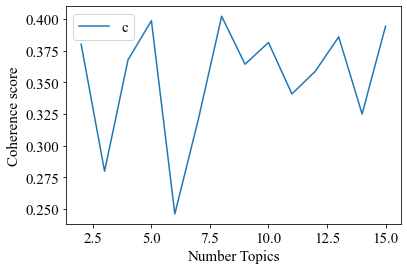

In [80]:
df3 = pd.read_csv("Case_list_1.csv")
df3=df3.transpose()
df3 = df3.rename(columns = {0: 'Number of Topics', 1: 'Preplexity' , 2: 'Coherence Score'}, inplace = False)

df3 =df3.iloc[1: , :]
df3
plt.figure(figsize=(8, 8))
df3.plot(x="Number of Topics", y="Coherence Score");
plt.xlabel("Number Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

plt.show()

In [99]:
k=df3.loc[df3['Coherence Score'].astype(float).idxmax()]['Number of Topics']
print("The best choice for the Number of Topics is  ",k)

The best choice for the Number of Topics   8.0


In [100]:
no_topics =k

#lda MODEL
lda = LdaMulticore(corpus, id2word=id2word, num_topics=no_topics)
lda.print_topics()

[(0,
  '0.033*"مُحَمَّد" + 0.026*"سَلَّم" + 0.026*"اللّٰهُمَّ" + 0.026*"جُمْعَة" + 0.025*"صل" + 0.021*"نَبِيّ" + 0.016*"اللَّه" + 0.010*"هِلال" + 0.010*"وَطَنِيّ" + 0.009*"وَطَن"'),
 (1,
  '0.073*"سَعُودِيّ" + 0.067*"وَطَنِيّ" + 0.045*"دار" + 0.022*"وَطَن" + 0.019*"كارفور" + 0.015*"اللَّه" + 0.014*"كؤد" + 0.013*"خَيْر" + 0.011*"اللّٰهُمَّ" + 0.010*"أَمْن"'),
 (2,
  '0.029*"هِلال" + 0.021*"شَبّ" + 0.011*"اللَّه" + 0.009*"مُوسَى" + 0.008*"مُباراة" + 0.008*"العبداللطيف" + 0.008*"مَفْرُوشات" + 0.007*"رِياض" + 0.007*"بِيرِيرا" + 0.006*"سَعُودِيّ"'),
 (3,
  '0.036*"وَطَنِيّ" + 0.033*"سَعُودِيّ" + 0.027*"اللَّه" + 0.017*"دار" + 0.016*"مَلِك" + 0.015*"سَلْمان" + 0.012*"وَطَن" + 0.011*"عِزّ" + 0.010*"مُحَمَّد" + 0.008*"دام"'),
 (4,
  '0.030*"هِلال" + 0.026*"شَبّ" + 0.018*"اللَّه" + 0.016*"تَخْفِيض" + 0.009*"وَطَنِيّ" + 0.008*"سَعُودِيّ" + 0.008*"نَصْر" + 0.006*"خَضِير" + 0.006*"لَيّ" + 0.005*"رِياض"'),
 (5,
  '0.045*"وَطَنِيّ" + 0.035*"سَعُودِيّ" + 0.023*"دار" + 0.016*"وَطَن" + 0.010*"تَعْلِيم"

In [ ]:
x=lda.show_topics(num_topics=10, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[1]for wd in tp[1]],[wd[0]for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
#for topic,words,weight in topics_words:
#    print(str(topic)+ "::"+ str(words))


##Below Code Prints Only Words 
#for topic,words in topics_words:
#    print(" ".join(words))

data_items = x
data_list = list(data_items)

df = pd.DataFrame(data_list)    
# Permanently changes the pandas settings
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

#df.index.names = ['Topic Number']

df=df.rename(columns={0:"Topic number",1:"Term and weights"})


df

<b> Enhanced Model

In [56]:
%%time
number_of_topics=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
case_list_2 = {}
for i in number_of_topics:
    no_topics =i
    #lda MODEL
    lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=i, 
                   random_state=100,
                   chunksize=100,
                   passes=10,
                   per_word_topics=True
                  )

    # Compute Perplexity 
    base_perplexity = lda.log_perplexity(corpus)
   

    # Compute Coherence Score
    coherence_model = CoherenceModel(model = lda, texts = Data['Tokens'].tolist(),
                                 coherence = "c_v")
    print("\nPerplexity: ", base_perplexity)
    coherence_lda_model_base = coherence_model.get_coherence()
    print("\nCoherence Score: ", coherence_lda_model_base)
    
    case = {'Topic_number': i, 'Preplexity': base_perplexity, 'Coherence Score':coherence_lda_model_base }
    case_list_2[i]=case


Perplexity:  -7.6163313789773115

Coherence Score:  0.29217801018221434

Perplexity:  -7.509744119856962

Coherence Score:  0.5111383282833525

Perplexity:  -7.5260573958427415

Coherence Score:  0.41219338078719814

Perplexity:  -7.514729476468477

Coherence Score:  0.4724644458498

Perplexity:  -7.581422493663893

Coherence Score:  0.4831705011777019

Perplexity:  -7.66301850986999

Coherence Score:  0.4952631439211984

Perplexity:  -7.740896340680578

Coherence Score:  0.4374644468312353

Perplexity:  -7.830486123619506

Coherence Score:  0.4615219220750354

Perplexity:  -7.971591788578893

Coherence Score:  0.49650608073887187

Perplexity:  -8.253586726963574

Coherence Score:  0.43281752356086345

Perplexity:  -8.566700340020091

Coherence Score:  0.4565123639416113

Perplexity:  -9.015723978875258

Coherence Score:  0.4617583994408388

Perplexity:  -9.487958897105283

Coherence Score:  0.42221064721403617

Perplexity:  -9.983226621419709

Coherence Score:  0.45265727535298167


<Figure size 576x576 with 0 Axes>

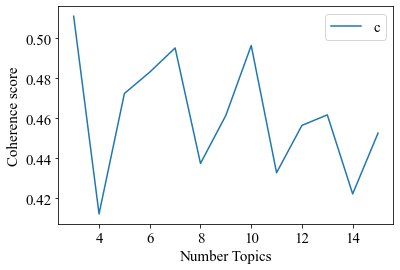

In [95]:
df = pd.DataFrame(case_list_2)
#df.to_csv("Case_list_1.csv")
df=df.transpose()
df=df.rename(columns = {'Topic_number': 'Number of Topics', 1: 'Preplexity' , 2: 'Coherence Score'}, inplace = False)


df=df.iloc[1: , :]
df
plt.figure(figsize=(8, 8))
df.plot(x="Number of Topics", y="Coherence Score");
plt.xlabel("Number Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

plt.show()



In [101]:
k=df.loc[df['Coherence Score'].astype(float).idxmax()]['Number of Topics']
print("The best choice for the Number of Topics with enhanced model is ",k)


The best choice for the Number of Topics with enhanced model  3.0


In [102]:
no_topics =k

#lda MODEL
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=no_topics, 
                   random_state=100,
                   chunksize=100,
                   passes=10,
                   per_word_topics=True
                  )
lda.print_topics()

[(0,
  '0.026*"هِلال" + 0.020*"شَبّ" + 0.013*"اللَّه" + 0.010*"أَهْلِيّ" + 0.009*"لَيّ" + 0.008*"قال" + 0.007*"مُوسَى" + 0.006*"لاعِب" + 0.006*"ٱِتِّفاق" + 0.006*"ٱِخْتِطاف"'),
 (1,
  '0.046*"كؤد" + 0.038*"كارفور" + 0.033*"سَعُودِيّ" + 0.025*"كُوَيْت" + 0.013*"أَمارَة" + 0.010*"مِصْر" + 0.010*"وَطَنِيّ" + 0.008*"مُشارَكَة" + 0.007*"طالِب" + 0.007*"تَعْلِيم"'),
 (2,
  '0.066*"وَطَنِيّ" + 0.053*"سَعُودِيّ" + 0.038*"دار" + 0.028*"مُحَمَّد" + 0.027*"اللّٰهُمَّ" + 0.026*"اللَّه" + 0.022*"جُمْعَة" + 0.017*"وَطَن" + 0.016*"سَلَّم" + 0.016*"صل"')]

In [103]:
def add_braces(text):
    new_text=[]
    for word in text:
        word=('\<{}>'.format(word))
        new_text.append(word)
        
    return new_text
    

In [105]:
x=lda.show_topics(num_topics=10, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[1]for wd in tp[1]],[wd[0]for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
#for topic,words,weight in topics_words:
#    weight=('\<{}>'.format(weight))
#    #print(str(topic)+ "::"+ str(weight))


##Below Code Prints Only Words 
#for topic,words in topics_words:
#    print(" ".join(words))

data_items = x
data_list = list(data_items)

df = pd.DataFrame(data_list)    
# Permanently changes the pandas settings
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

#df.index.names = ['Topic Number']

df=df.rename(columns={0:"Topic number",1:"Term and weights"})


df

,Topic number,Term and weights
0,0,"[(هِلال, 0.026340332), (شَبّ, 0.019686026), (اللَّه, 0.012877518), (أَهْلِيّ, 0.009616047), (لَيّ, 0.008687614), (قال, 0.008142728), (مُوسَى, 0.007443508), (لاعِب, 0.006257765), (ٱِتِّفاق, 0.0058048624), (ٱِخْتِطاف, 0.0057721864)]"
1,1,"[(كؤد, 0.045598), (كارفور, 0.03819502), (سَعُودِيّ, 0.032698464), (كُوَيْت, 0.02546187), (أَمارَة, 0.013413613), (مِصْر, 0.010458157), (وَطَنِيّ, 0.009801267), (مُشارَكَة, 0.008181568), (طالِب, 0.0072326013), (تَعْلِيم, 0.006794601)]"
2,2,"[(وَطَنِيّ, 0.06556581), (سَعُودِيّ, 0.05314741), (دار, 0.03836944), (مُحَمَّد, 0.028331008), (اللّٰهُمَّ, 0.027437964), (اللَّه, 0.026306123), (جُمْعَة, 0.021989074), (وَطَن, 0.01722158), (سَلَّم, 0.01626171), (صل, 0.015767692)]"


In [106]:
d = []
for tp in topics_words:
    
    d.append((tp[0],tp[2],tp[1]))
    
Last_Resut=pd.DataFrame(d, columns=('Topic_Number', 'Words', 'Weight'))


In [110]:
x=lda.show_topics(num_topics=10, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[1]for wd in tp[1]],[wd[0]for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
#for topic,words,weight in topics_words:
#    print(str(topic)+ "::"+ str(words))


##Below Code Prints Only Words 
#for topic,words in topics_words:
#    print(" ".join(words))

data_items = x
data_list = list(data_items)

df = pd.DataFrame(data_list)    
# Permanently changes the pandas settings
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

#df.index.names = ['Topic Number']

df=df.rename(columns={0:"Topic number",1:"Term and weights"})


df

,Topic number,Term and weights
0,0,"[(هِلال, 0.026340332), (شَبّ, 0.019686026), (اللَّه, 0.012877518), (أَهْلِيّ, 0.009616047), (لَيّ, 0.008687614), (قال, 0.008142728), (مُوسَى, 0.007443508), (لاعِب, 0.006257765), (ٱِتِّفاق, 0.0058048624), (ٱِخْتِطاف, 0.0057721864)]"
1,1,"[(كؤد, 0.045598), (كارفور, 0.03819502), (سَعُودِيّ, 0.032698464), (كُوَيْت, 0.02546187), (أَمارَة, 0.013413613), (مِصْر, 0.010458157), (وَطَنِيّ, 0.009801267), (مُشارَكَة, 0.008181568), (طالِب, 0.0072326013), (تَعْلِيم, 0.006794601)]"
2,2,"[(وَطَنِيّ, 0.06556581), (سَعُودِيّ, 0.05314741), (دار, 0.03836944), (مُحَمَّد, 0.028331008), (اللّٰهُمَّ, 0.027437964), (اللَّه, 0.026306123), (جُمْعَة, 0.021989074), (وَطَن, 0.01722158), (سَلَّم, 0.01626171), (صل, 0.015767692)]"


In [111]:
df.to_csv("Topic_weights_full_tweets.csv", encoding="utf-8-sig")

In [112]:
%%time
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=Data['Tweet_clean']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=Data['Tweet_clean'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Wall time: 13min 14s


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.8361,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",وَطَنِيّ اَهْل خَيْر كَفَي زَوْج مَرِيض سَرَطان مُنْتَشِر جِسْم مقعدعايش كِيمِيائِيّ هَمّ سَداد دِين يشهدالله فَصْل عَمَل اِصابَه عَمَل خارِج مُؤَقَّت سِجْن هوعائلنا بعدالله مالنااحدتراكمت دَيْن عاجِز سدادهاماعندنادخل سَكَّن ايجارتكفون اللَّه حال صَعْب
1,1,0.0,0.6629,"هِلال, شَبّ, اللَّه, أَهْلِيّ, لَيّ, قال, مُوسَى, لاعِب, ٱِتِّفاق, ٱِخْتِطاف",قَرَّر فِنْلَنْدا اِلْغاء قَيْد تَطْعِيم شَخْص سَنّ كامِل
2,2,1.0,0.5935,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",سَعُودِيّ فلورز اِخْتار لَيّ يناسبك اِسْتَعَدّ اِنْبَهَر تَنْفِيذ واصَل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ اَمارَه دِفاع جَوِّيّ قُبُول مُوَحَّد كُوَيْت بُوسْنِيّ وَطَن حبيت خَيْر طالَب مَلِك دِراسَه جُمْعَه
3,3,1.0,0.5202,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",اِسْتَمْتَع خُصُوصِيّ حَدِيقَه خاصّ صَنَع جَمال تَمَيُّز رَفاهِيَّه عَيْش جَوّ اِسْتَمْتَع رَفاهِيَّه واصَل عَبْر رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت خَيْر عَمْرو دِياب قاطَع اَم سِي مِصْر جُمْعَه دِرْع دِرْع بَلَد
4,4,1.0,0.7530,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",مَشْرُوع اَرْضِيَّه خَرَسان مَطْبُوع يلا خاصّ قَصِيم اِسْتَمْتَع اَرْضِيَّه مُمَيَّز تَواصُل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت جُمْعَه اَحَد قُبُول مُوَحَّد قاطَع اَم سِي مِصْر عَمْرو دِياب
5,5,0.0,0.6334,"هِلال, شَبّ, اللَّه, أَهْلِيّ, لَيّ, قال, مُوسَى, لاعِب, ٱِتِّفاق, ٱِخْتِطاف",تَوَقَّع مُؤَشِّر مُقْبِل اَزْمَه مالِيّ حُكُومَه ماعندها لُوس شَعْب مُفْلِس نَفْط صاعِد نازِل تَضَخُّم اَفْلَس شَرِكَه كَثِير مُؤَشِّر داشين طَوْفَه قَرِيب
6,6,1.0,0.6486,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",خَوْف عَدُوّ جَماعِيّ اَدَّي كارِثَه مُعْتَقَل سِياسِيّ سابِق اَهْل مُعْتَقَل حالِيّ طالَب نِظام السيسي سُرْعَه تَطْعِيم فَيْرُوس حِفاظ رُوح مُطالِب اَيْض اِفْراج سَجِين عُمَر
7,7,1.0,0.6639,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",هَمّ اَمْر تَمَنَّي تَخْفِيض تَذْكَرَه مَطْرُوح قِسْم عائِلَه نَظَر زِيادَه طَلَب تَذْكَرَه فَرْد مِرْفَق صُور وَضَّح معانات قِسْم فَرْد جُلُوس مَمَرّ كَبِير مَقْعَد مُتاح عائِلَه سَواء
8,8,1.0,0.8139,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",وَطَنِيّ تَلْقِيح كَشّاف اِسْلامِيّ جَزائِرِيّ فَوْج فَتْح تَنْظِيم تَسْيِير وَطَنِيّ تَلْقِيح فَيْرُوس بَلَد وَلَد دُرّاج وِلايَه المسيله كَشّاف كَشّاف اِسْلامِيّ جَزائِرِيّ فَوْج فَتْح
9,9,1.0,0.8327,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",نِداء اِنْسانِيّ مَرِيض مُسْتَشْفَي جامِعَه اَمْرِيكِيّ حاجَه ماسّ بلازما فِئَه دَم شَخْص مُتَعافِي اَقَلّ شَهْر تَواصُل


In [113]:
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.8361,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",وَطَنِيّ اَهْل خَيْر كَفَي زَوْج مَرِيض سَرَطان مُنْتَشِر جِسْم مقعدعايش كِيمِيائِيّ هَمّ سَداد دِين يشهدالله فَصْل عَمَل اِصابَه عَمَل خارِج مُؤَقَّت سِجْن هوعائلنا بعدالله مالنااحدتراكمت دَيْن عاجِز سدادهاماعندنادخل سَكَّن ايجارتكفون اللَّه حال صَعْب
1,1,0.0,0.6629,"هِلال, شَبّ, اللَّه, أَهْلِيّ, لَيّ, قال, مُوسَى, لاعِب, ٱِتِّفاق, ٱِخْتِطاف",قَرَّر فِنْلَنْدا اِلْغاء قَيْد تَطْعِيم شَخْص سَنّ كامِل
2,2,1.0,0.5935,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",سَعُودِيّ فلورز اِخْتار لَيّ يناسبك اِسْتَعَدّ اِنْبَهَر تَنْفِيذ واصَل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ اَمارَه دِفاع جَوِّيّ قُبُول مُوَحَّد كُوَيْت بُوسْنِيّ وَطَن حبيت خَيْر طالَب مَلِك دِراسَه جُمْعَه
3,3,1.0,0.5202,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",اِسْتَمْتَع خُصُوصِيّ حَدِيقَه خاصّ صَنَع جَمال تَمَيُّز رَفاهِيَّه عَيْش جَوّ اِسْتَمْتَع رَفاهِيَّه واصَل عَبْر رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت خَيْر عَمْرو دِياب قاطَع اَم سِي مِصْر جُمْعَه دِرْع دِرْع بَلَد
4,4,1.0,0.7530,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",مَشْرُوع اَرْضِيَّه خَرَسان مَطْبُوع يلا خاصّ قَصِيم اِسْتَمْتَع اَرْضِيَّه مُمَيَّز تَواصُل رَقْم تالِي دَمّام دِفاع جَوِّيّ سَعُودِيّ حبيت جُمْعَه اَحَد قُبُول مُوَحَّد قاطَع اَم سِي مِصْر عَمْرو دِياب
5,5,0.0,0.6334,"هِلال, شَبّ, اللَّه, أَهْلِيّ, لَيّ, قال, مُوسَى, لاعِب, ٱِتِّفاق, ٱِخْتِطاف",تَوَقَّع مُؤَشِّر مُقْبِل اَزْمَه مالِيّ حُكُومَه ماعندها لُوس شَعْب مُفْلِس نَفْط صاعِد نازِل تَضَخُّم اَفْلَس شَرِكَه كَثِير مُؤَشِّر داشين طَوْفَه قَرِيب
6,6,1.0,0.6486,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",خَوْف عَدُوّ جَماعِيّ اَدَّي كارِثَه مُعْتَقَل سِياسِيّ سابِق اَهْل مُعْتَقَل حالِيّ طالَب نِظام السيسي سُرْعَه تَطْعِيم فَيْرُوس حِفاظ رُوح مُطالِب اَيْض اِفْراج سَجِين عُمَر
7,7,1.0,0.6639,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",هَمّ اَمْر تَمَنَّي تَخْفِيض تَذْكَرَه مَطْرُوح قِسْم عائِلَه نَظَر زِيادَه طَلَب تَذْكَرَه فَرْد مِرْفَق صُور وَضَّح معانات قِسْم فَرْد جُلُوس مَمَرّ كَبِير مَقْعَد مُتاح عائِلَه سَواء
8,8,1.0,0.8139,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",وَطَنِيّ تَلْقِيح كَشّاف اِسْلامِيّ جَزائِرِيّ فَوْج فَتْح تَنْظِيم تَسْيِير وَطَنِيّ تَلْقِيح فَيْرُوس بَلَد وَلَد دُرّاج وِلايَه المسيله كَشّاف كَشّاف اِسْلامِيّ جَزائِرِيّ فَوْج فَتْح
9,9,1.0,0.8327,"كؤد, كارفور, سَعُودِيّ, كُوَيْت, أَمارَة, مِصْر, وَطَنِيّ, مُشارَكَة, طالِب, تَعْلِيم",نِداء اِنْسانِيّ مَرِيض مُسْتَشْفَي جامِعَه اَمْرِيكِيّ حاجَه ماسّ بلازما فِئَه دَم شَخْص مُتَعافِي اَقَلّ شَهْر تَواصُل


In [114]:
%%time
df_dominant_topic.to_csv("Final_result.csv", encoding="utf-8-sig") 

Wall time: 1.77 s


<b>Visualization

In [115]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 


In [116]:
%%time
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(no_topics))


# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(no_topics) +'.html')
LDAvis_prepared        
        


Wall time: 27.3 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.266651 -0.136425       1        1  43.434031
0     -0.260497 -0.146328       2        1  30.898473
1     -0.006154  0.282753       3        1  25.667496, topic_info=                Term          Freq         Total Category  logprob  loglift
30          وَطَنِيّ  55494.000000  55494.000000  Default  30.0000  30.0000
41105            كؤد  20956.000000  20956.000000  Default  29.0000  29.0000
1595             دار  29856.000000  29856.000000  Default  28.0000  28.0000
13454         كارفور  17554.000000  17554.000000  Default  27.0000  27.0000
51         سَعُودِيّ  56359.000000  56359.000000  Default  26.0000  26.0000
1387        مُحَمَّد  22034.000000  22034.000000  Default  25.0000  25.0000
216       اللّٰهُمَّ  21338.000000  21338.000000  Default  24.0000  24.0000
1171           هِلال  14572.000000  14572.000000  Default  23.0000  23.0000
56           كُوَيْت  11702.000000  11702.000000  Default  22.0000  22.0000
1367            شَبّ  10891.000000  10891.000000  Default  21.0000  21.0000
61             وَطَن  13393.000000  13393.000000  Default  20.0000  20.0000
4113          سَلَّم  12647.000000  12647.000000  Default  19.0000  19.0000
45           جُمْعَة  18141.000000  18141.000000  Default  18.0000  18.0000
13899             صل  12263.000000  12263.000000  Default  17.0000  17.0000
1358          نَبِيّ  10366.000000  10366.000000  Default  16.0000  16.0000
2             اللَّه  27583.000000  27583.000000  Default  15.0000  15.0000
40           أَمارَة   6165.000000   6165.000000  Default  14.0000  14.0000
83             مِصْر   4807.000000   4807.000000  Default  13.0000  13.0000
890         أَهْلِيّ   5320.000000   5320.000000  Default  12.0000  12.0000
57              لَيّ   4806.000000   4806.000000  Default  11.0000  11.0000
8              خَيْر   8634.000000   8634.000000  Default  10.0000  10.0000
54               قال   4513.000000   4513.000000  Default   9.0000   9.0000
641            وَلِي   6218.000000   6218.000000  Default   8.0000   8.0000
1993       مُشارَكَة   3790.000000   3790.000000  Default   7.0000   7.0000
5424          مُوسَى   4118.000000   4118.000000  Default   6.0000   6.0000
221           سَيِّد   5673.000000   5673.000000  Default   5.0000   5.0000
363            طالِب   3324.000000   3324.000000  Default   4.0000   4.0000
1982            عِزّ   5198.000000   5198.000000  Default   3.0000   3.0000
1780           أَمْن   4925.000000   4925.000000  Default   2.0000   2.0000
1765           لاعِب   3462.000000   3462.000000  Default   1.0000   1.0000
216       اللّٰهُمَّ  21337.962956  21338.827577   Topic1  -3.5958   0.8339
61             وَطَن  13392.882054  13393.770903   Topic1  -4.0616   0.8339
13899             صل  12262.222332  12263.074114   Topic1  -4.1498   0.8339
4113          سَلَّم  12646.410525  12647.294055   Topic1  -4.1189   0.8339
1387        مُحَمَّد  22032.465132  22034.232536   Topic1  -3.5638   0.8338
1358          نَبِيّ  10365.337309  10366.267013   Topic1  -4.3178   0.8338
641            وَلِي   6217.902029   6218.793113   Topic1  -4.8289   0.8338
221           سَيِّد   5672.232871   5673.126464   Topic1  -4.9207   0.8338
1982            عِزّ   5197.570896   5198.422838   Topic1  -5.0081   0.8338
1780           أَمْن   4924.139698   4925.022585   Topic1  -5.0622   0.8337
102            شَعْب   4760.481936   4761.401894   Topic1  -5.0960   0.8337
2692         صُحْبَة   4276.056062   4276.910997   Topic1  -5.2033   0.8337
1873             دام   4270.676176   4271.531276   Topic1  -5.2045   0.8337
526            أَمان   4306.767332   4307.631221   Topic1  -5.1961   0.8337
1248           صَلاة   4406.261911   4407.154844   Topic1  -5.1733   0.8337
1032          صَلَّى   4253.917265   4254.803606   Topic1  -5.2085   0.8337
1196           باراك   4013.456340   4014.337902   Topic1  -5.2667   0.8337
8802           مَجْد   3520.102375   35